In [184]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
import matplotlib.pyplot as plt
from functools import partial
fastbook.setup_book()

In [185]:
#hide
from fastbook import *

## Machine Learning VS DeepLearning
Machine learning is a discipline where we define a program not by writing it entirely ourselves, but by learning from data. Deep learning is a specialty within machine learning that uses neural networks with multiple layers. Image classification is a representative example (also known as image recognition). We start with labeled data; that is, a set of images where we have assigned a label to each image indicating what it represents. Our goal is to produce a program, called a model, which, given a new image, will make an accurate prediction regarding what that new image represents.

## What is Drivetrain Approach?


There are many accurate models that are of no use to anyone, and many inaccurate models that are highly useful. To ensure that your modeling work is useful in practice, you need to consider how your work will be used. In 2012 Jeremy, along with Margit Zwemer and Mike Loukides, introduced a method called *the Drivetrain Approach* for thinking about this issue.

The Drivetrain Approach, illustrated in <<drivetrain>>, was described in detail in ["Designing Great Data Products"](https://www.oreilly.com/radar/drivetrain-approach-data-products/). The basic idea is to start with considering your objective, then think about what actions you can take to meet that objective and what data you have (or can acquire) that can help, and then build a model that you can use to determine the best actions to take to get the best results in terms of your objective.

<img src="images/drivetrain-approach.png" id="drivetrain" caption="The Drivetrain Approach">

Consider a model in an autonomous vehicle: you want to help a car drive safely from point A to point B without human intervention. Great predictive modeling is an important part of the solution, but it doesn't stand on its own; as products become more sophisticated, it disappears into the plumbing. Someone using a self-driving car is completely unaware of the hundreds (if not thousands) of models and the petabytes of data that make it work. But as data scientists build increasingly sophisticated products, they need a systematic design approach.

We use data not just to generate more data (in the form of predictions), but to produce *actionable outcomes*. That is the goal of the Drivetrain Approach. Start by defining a clear *objective*. For instance, Google, when creating their first search engine, considered "What is the user’s main objective in typing in a search query?" This led them to their objective, which was to "show the most relevant search result." The next step is to consider what *levers* you can pull (i.e., what actions you can take) to better achieve that objective. In Google's case, that was the ranking of the search results. The third step was to consider what new *data* they would need to produce such a ranking; they realized that the implicit information regarding which pages linked to which other pages could be used for this purpose. Only after these first three steps do we begin thinking about building the predictive *models*. Our objective and available levers, what data we already have and what additional data we will need to collect, determine the models we can build. The models will take both the levers and any uncontrollable variables as their inputs; the outputs from the models can be combined to predict the final state for our objective.

## What Does “Fitting a Function to Data” Mean?

In machine learning, fitting a function to data means finding a mathematical function that best represents the relationship between input data and output data. This process allows us to make predictions or understand underlying patterns in the data.
<br><br>
Modeling Data with Functions: Fitting Linear, Quadratic, and more...
<br><br>
Why is this important?<br>
	•	Prediction: Once we have a function that models our data well, we can use it to predict outcomes for new, unseen inputs.<br>
	•	Understanding Relationships: It helps in understanding how different variables in the data are related.

### Linear Equation

A **linear equation** is a type of mathematical equation where the highest power of the variable (usually $x$) is 1. This means that the graph of a linear equation is always a straight line, which is why it's called "linear."

The general form of a linear equation is:

$$
y = mx + b
$$

Where:
- $m$: The slope of the line (how steep it is).
- $x$: The independent variable (input).
- $b$: The y-intercept (where the line crosses the y-axis).

---

### **Breaking Down the Components**

#### 1. **$m$: The Slope**
- The slope ($m$) represents the rate of change of $y$ with respect to $x$. It tells us how much $y$ changes for every unit increase in $x$.
- If $m > 0$, the line slopes upward as $x$ increases.
- If $m < 0$, the line slopes downward as $x$ increases.
- If $m = 0$, the line is horizontal (no slope).

#### 2. **$x$: The Independent Variable**
- $x$ is the input value. You can think of it as the "cause" or the thing you control in the equation.

#### 3. **$b$: The Y-Intercept**
- The y-intercept ($b$) is the value of $y$ when $x = 0$. It tells us where the line crosses the y-axis.

#### 4. **$y$: The Dependent Variable**
- $y$ is the output value. It depends on the value of $x$ and the parameters $m$ and $b$.

---

### **Graph of a Linear Equation**

The graph of a linear equation is always a straight line. The slope ($m$) determines the direction and steepness of the line, while the y-intercept ($b$) determines where the line crosses the y-axis.

For example:
- If $m = 2$ and $b = 1$, the equation is $y = 2x + 1$. This line has a positive slope and crosses the y-axis at $y = 1$.
- If $m = -1$ and $b = 3$, the equation is $y = -x + 3$. This line has a negative slope and crosses the y-axis at $y = 3$.

---

### **How Do We Know if an Equation Is Linear?**

To determine if an equation is linear, check the following:
1. The highest power of $x$ must be 1. For example:
   - $y = 2x + 3$ is linear because the highest power of $x$ is 1.
   - $y = x^2 + 3$ is not linear because the highest power of $x$ is 2.
2. There should be no terms involving products of variables (e.g., $xy$), exponents greater than 1, or roots.

---

### **Examples of Linear Equations**

#### **Linear Equations:**
1. $y = 3x + 5$
   - Here, $m = 3$ and $b = 5$. The line has a positive slope and crosses the y-axis at $y = 5$.
2. $y = -2x + 1$
   - Here, $m = -2$ and $b = 1$. The line has a negative slope and crosses the y-axis at $y = 1$.
3. $y = 4$
   - This is a special case where $m = 0$ and $b = 4$. The line is horizontal and always equals 4.

### **Applications of Linear Equations**

Linear equations are widely used in real-world scenarios, such as:
1. **Budgeting**: Modeling income and expenses.
   - Example: $y = 100x + 500$ could represent monthly expenses, where $x$ is the number of items purchased and $y$ is the total cost.
2. **Physics**: Describing motion at constant speed.
   - Example: $d = vt + d_0$, where $d$ is distance, $v$ is velocity, $t$ is time, and $d_0$ is the initial position.
3. **Machine Learning**: Linear regression models use linear equations to predict outcomes based on input features.
   - Example: Predicting house prices based on size using $y = w_1x_1 + w_2x_2 + b$.

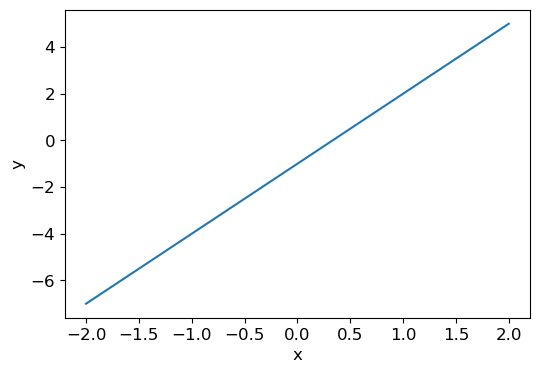

In [190]:
def linear(m, b, x):
    """
    Computes the value of a linear equation y = mx + b for a given x.
    
    Parameters:
        m (float): The slope of the line.
        b (float): The y-intercept of the line.
        x (float or array-like): The input value(s) for which to compute y.
    
    Returns:
        float or array-like: The computed value(s) of y.
    """
    return m * x + b

def make_linear(m, b):
    """
    Creates a new linear function with fixed slope (m) and y-intercept (b).
    
    Parameters:
        m (float): The slope of the line.
        b (float): The y-intercept of the line.
    
    Returns:
        function: A new function that takes only x as input and computes y = mx + b.
    """
    return partial(linear, m, b)

f = make_linear(3, -1)
f(1.5)

plot_function(f, 'x', 'y')

### Quadratic Equation
A quadratic equation is a type of mathematical equation where the highest power of the variable (usually x) is 2. In simpler terms, it's an equation that involves a squared term $(x2)$, and no higher powers like $x^3, x^4$ etc.

The general form of a quadratic equation is:

$$ax2+bx+c=0$$

Where:
a, b, and c are constants (numbers),
a != 0 (because if a=0, the equation would no longer have an $x^2$ term and wouldn't be quadratic).

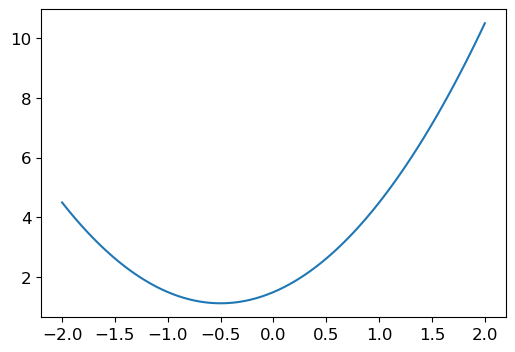

In [191]:
def quad(a,b,c,x): return a*(x**2) + b*x + c
def make_quad(a,b,c): return partial(quad,a,b,c)

f = make_quad(1.5,1.5,1.5)
f(1.5)

plot_function(f)

In machine learning, certain types of equations and mathematical concepts are more commonly used than others, depending on the problem being solved and the algorithms being applied. Below is a breakdown of which types of equations and functions are most frequently encountered in machine learning:

### **Summary Table:**

| Type of Equation         | Frequency in ML | Example Use Case                          |
|--------------------------|-----------------|-------------------------------------------|
| Linear Equations         | Very Common     | Linear Regression, Neural Networks        |
| Quadratic Equations      | Common          | Loss Functions, Regularization            |
| Exponential/Logarithmic  | Very Common     | Sigmoid, Softmax, Log-Likelihood          |
| Polynomial Equations     | Occasional      | Polynomial Regression, Feature Engineering|
| Rational Functions       | Rare            | Approximation in Specialized Algorithms   |
| Trigonometric Functions  | Rare            | Signal Processing, Fourier Analysis       |
| Radical Equations        | Rare            | Distance Calculations                     |
| Higher-Degree Polynomials| Rare            | Specialized Feature Engineering           |
| Systems of Equations     | Common          | Matrix Operations, PCA                    |

Let's see an example of data, in real life, data always has some noise, let's create a plot with some dummy data and noise.

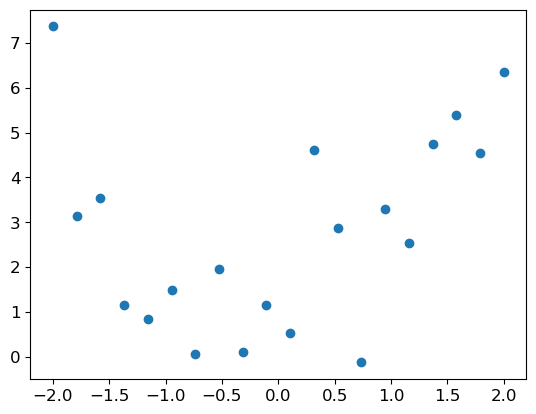

In [192]:
from numpy.random import normal, seed, uniform
import torch
# This ensures that every time you run the code, the same sequence of "random" numbers will be generated.
# Why Use 42?
# The number 42 is arbitrary and commonly used as a seed value because it's a popular reference to The 
# Hitchhiker's Guide to the Galaxy , where 42 is humorously described as the "Answer to the Ultimate Question of Life
#  the Universe, and Everything."
np.random.seed(42)

def noise(x, scale): 
  """
  :param x: A NumPy array or object whose shape determines the size of the noise to generate.
  :param scale: A parameter that controls the standard deviation (or "spread") of the random noise.
  """
  return normal(scale=scale, size=x.shape)

def add_noise(x, mult, add): return x * (1 + noise(x, mult)) + noise(x, add)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.3, 1.5)

plt.scatter(x, y)


Now we going to try to reconstruct the quadratic equation here. Find the one which matches this data.
<br>
We can create a function which plots our data and plots a function which is quadratic.

In [193]:
from ipywidgets import interact

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6, 4), ax=None):
    if ax is None:  # If no ax is provided, create a new figure and axis
        fig, ax = plt.subplots(figsize=figsize)
    x = torch.linspace(min, max, 100)
    ax.plot(x, f(x), label="Quadratic Function")  # Add a label for the legend
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
    return ax  # Return the axis for further use

@interact(a=1.5, b=1.5, c=1.5)
def ploat_quad(a,b,c):
     # Create a single figure and axis
    f = make_quad(a, b, c)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x, y, color='blue', label="Noisy Data")
    plot_function(f, ax=ax)    
    
    ax.legend()
    plt.show()

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

As you can see, when dragging the sliders we can adjust the quadratic line to fit better between the data. This is an example of how we adjust parameters to train our model programatically.

 

## Optimization

Now we need something to measure how good is our model so check if prediction is getting better or worse, that is called a Loss Function. There are a lot of loss functions which we can pick but perhaps the most simplest and common one is MSE "Mean Squared Error".

In [194]:
def mse(predictions, actuals): return ((predictions - actuals)**2).mean()

Now we can run the same `plot_quad` function as before, but this time we are going to calculate the loss MSE, between the value that we predict `f(x)` and and the actuals.

In [195]:
@interact(a=1.5, b=1.5, c=1.5)
def ploat_quad(a,b,c):
    f = make_quad(a,b,c)
     # Create a single figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x, y, color='blue', label="Noisy Data")
    loss = mse(f(x), y)
    plot_function(f, ax=ax, title=f'MSE: {loss:.2f}')    
    
    ax.legend()
    plt.show()

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

Now we can see by changing the `a,b,c` values our loss function performs better or worse. <br>
This is called *Optimization*.

This is a manual method to check the quadractic values to find the best match for our data. However, there is a much faster way to do this and that's by calculating it's **derivatives**.

Everything in pyTorch is treated as a tensor, it has 2D, 3D and so fourth.. kind of tensors. Below is an example of a 1D tensor also known as rank 1 tensor. Let's see how a simple optimization work.

In [196]:
def quad_mse(params):
  f = make_quad(*params)
  return mse(f(x), y)

quad_mse([1.5, 1.5, 1.5])

tensor(4.3574, dtype=torch.float64)

As you can see in the result, the return is type of 1d tensor.

Next let's see how pyTorch calculates gradient "Slope" value for us.

In [197]:
abc = torch.tensor([1.5, 1.5, 1.5])
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

The result shows that we have created a pyTorch tensor and asking to calculate the gradients.

In [198]:
loss = quad_mse(abc)
loss

tensor(4.3574, dtype=torch.float64, grad_fn=<MeanBackward0>)

You can see the result has a parameter called `grad_fn`.  To do the gradient calculation, we call `backwards()` on our tensor. When running `background()` pytorch adds a new attribute called `grad` to our input.

In [199]:
loss.backward()
abc.grad

tensor([3.7793, 3.0492, 1.8709])

This out put tell us that, if we increase **a** (3.7783) the loss will go down], if we increase **b** (3.0492) the loss will go a small amount (Learning rate which is a hyperparameter)later we will learn how to pick a very good *learning rate* down and if increasy **c** the loss will go down as well.<br>
Now we want the loss to go down, that means we have to increase **a, b, c**, but how much by?

In [200]:
# with statement in python is like try catch block in Swift
with torch.no_grad():
    # the learning rate is 0.01
    abc -= abc.grad * 0.01
    loss = quad_mse(abc)

print(f"loss={loss: .2f}")

loss= 4.10


In this example, we reduced the grad a little bit just to not to jump too far, but this function is how pyTorch under the hood calculates the gradients for us.
<br>
This is how we do Optimization, and the example above is the most basic kind of optimizating but they are all built on this principle and it's called **Gradient Decent**.

## What is Gradient Decent?

Gradient descent is an algorithm that numerically estimates where a function outputs its lowest values.<br><br>
Gradient descent is the go-to algorithm for navigating the complex landscape of machine learning and deep learning. It helps models find the optimal set of parameters by iteratively adjusting them in the opposite direction of the gradient.
<br><br>
And you can see why it's called **Gradient Decent** in the code below:

In [201]:
# We calculate the gradients
with torch.no_grad():
  # Then through a descent, we try to decrease the loss
  abc -= abc.grad * 0.01

Now what kind of mathematical function can we use to find these parameters values? We can't use quadratic for everything, in reality data is much more complex than a quadratic.

### What is a Derivative?
In short, the derivative is a function that tells you, if you increase the input, does the output increase or decreaase? and by how much? That's called a slope, or gradient. PyTorch can already calculate this for us, so we don't need to know how to calculate derivatives our selves.<br>
Derivate is part of differential calculus. A derivative in math is a way to measure how something is changing. It tells you the rate of change of one quantity with respect to another. Think of it as answering the question: "How much does this thing change when that thing changes?"

For example:

- If you're driving, the derivative of your position with respect to time is your speed .
- If you're looking at the temperature over time, the derivative tells you how fast the temperature is rising or falling.

Inside every DeepLearning model, and framework like PyTorch, it uses derivatives to find this value for us.

In reality, our data is almost never a perfect curved, so we can't use quadratics for all sorts of data to train our models. It turns out, there is something much simpler to fit the data into a function.<br>

### Rectifier

Rectified Linear Unit (ReLU) is a popular activation functions used in neural networks, especially in deep learning models. It has become the default choice in many architectures due to its simplicity and efficiency. The ReLU function is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero.<br>
<br>
In simpler terms, ReLU allows positive values to pass through unchanged while setting all negative values to zero.

The ReLU function can be described mathematically as follows:
$$
f
(
x
)
=
max
(
0
,
x
)
f(x)=max(0,x)
$$
Where:<br>

- $x$ is the input to the neuron.
- The function returns $x$ if $x$ is greater than 0.
- If $x$ is less than or equal to 0, the function returns 0.

In [202]:
def rectified_linear(m,b,x):
  y = m * x + b
  return torch.clip(y, 0.)

Let's see how it looks like on a plot.

In [203]:
@interact(m=(1.5), b=(1.5))
def plot_relu(m, b):
  plot_function(partial(rectified_linear, m,b))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

Now this might not interesting enough to be enough nose robust. That's where *Dual Rectified Linear Units (DReLUs)* comes to the play.

### Dual Rectified Linear Units (DReLUs)
In simple terms, Dual Rectified Linear Units (DReLUs) are a type of activation function used in neural networks, which are a key component of machine learning models. They are an extension of the popular Rectified Linear Unit (ReLU) but with a twist: instead of having just one slope for positive values, DReLUs allow two different slopes for positive inputs.

#### Why Use DReLUs?
- Flexibility : By allowing two slopes, DReLUs can better capture nuanced patterns in the data.
- Improved Performance : In some cases, DReLUs have been shown to outperform traditional ReLUs because they provide more expressive power to the neural network.
- Efficiency : Like ReLUs, DReLUs are computationally efficient and help prevent the vanishing gradient problem.

In [204]:
def double_relu(m1, b1, m2, b2, x):
  return rectified_linear(m1, b1, x) + rectified_linear(m2, b2, x)

@interact(m1=1.5, b1=1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
  plot_function(partial(double_relu, m1, b1, m2, b2))

interactive(children=(FloatSlider(value=1.5, description='m1', max=4.5, min=-1.5), FloatSlider(value=1.5, desc…

Now what's interesting here is that, we cann add as many as `relu's` together as we want instead of just doubling it. And if we can add as many relu's as we want, and we enough relus's, we can have it as close as we want. Image like an audio wave form.

That's basically Deep Learning. Everything else from now on, is just how to optmize or tweak the values to predict better output, or how to make it use less data and so forth...

When you have Relu's getting added together and gradient decent to optimize the parameters and samples of input and outputs that we want the computer does the rest.
<br>
Check out the image below, the circles represents what we have learned so far, but there is nothing in between these transformation we need to do to draw the nice owl, the computer will do the rest when you provice the aforementioned data.

<div>
<img src="./images/owl.png" width="350"/>
</div>

---

## NumPy Arrays and PyTorch Tensors
[NumPy](https://numpy.org/) is the most widely used library for scientific and numeric programming in Python. It provides very similar functionality and a very similar API to that provided by PyTorch; however, it does not support using the GPU or calculating gradients, which are both critical for deep learning.<br><br>
In PyTorch, a tensor is a multi-dimensional array similar to a NumPy array but with the added benefit of being able to run on GPUs for faster computation. Tensors are the fundamental data structure used in PyTorch for all operations related to deep learning, including model parameters, inputs, outputs, and intermediate computations.<br>
PyTorch uses tensors as its core data structure for handling numerical computations, particularly in neural networks. It includes 1D, 2D, and 3D tensors.
<br><br>
#### Origin of the Term "Tensor":
The term "tensor" comes from mathematics and physics, where it was used to describe quantities that have magnitude and direction, generalizing vectors and scalars. In the context of deep learning and PyTorch, "tensor" extends to any n-dimensional array, regardless of whether it represents directional data.

#### Ranks in Tensors
In the context of tensors, rank refers to the number of dimensions or axes that a tensor has. It's an easy way to describe how "complex" or "multi-dimensional" the data structure is.<br><br>

Simple Explanation:<br>
Rank 0: A scalar, like a single number (e.g., 42). It has no dimensions, just a value.<br>
Rank 1: A vector, which is like a list of numbers (e.g., [1, 2, 3]). It has one dimension.<br>
Rank 2: A matrix, which looks like a table or grid of numbers (e.g., [[1, 2], [3, 4]]). It has two dimensions: rows and columns.<br>
Rank 3: A cube of numbers, or you can think of it as a stack of matrices. For example, in image processing, this could represent an image with color channels (e.g., RGB image). This has three dimensions.<br>
Rank N: For any higher number, you're essentially talking about higher-dimensional arrays, where the complexity of the data structure increases with each additional dimension.<br>

**Remember**: _rank_ is the number of axes or dimensions in a tensor; _shape_ is the size of each axis of a tensor.

#### Shape in Tensors
`shape` refers to the dimensions or size of each dimension of the tensor. It describes how the data is organized in terms of rows, columns, and potentially additional dimensions if the tensor is multi-dimensional.<br><br>

Explanation:<br>
Tensor Shape: The shape of a tensor is essentially an array of integers that specifies the size of each dimension of the tensor.<br><br>
For a 1D tensor (vector), the shape would be `[length]`.<br>
For a 2D tensor (matrix), the shape would be `[rows, columns]`.<br>
For a 3D tensor, you might see `[depth, height, width]`, or in the case of images, `[channels, height, width]`.<br>

The *length* of a tensor's shape is its rank:<br>
We can also get a tensor's rank directly with `ndim`:

In [205]:
example_tensor = torch.tensor([1, 2, 3])
example_tensor.ndim

1

In [206]:
example_2d_tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
example_2d_tensor.ndim

2

Let's illustrate an example using an image from MNIST "handr written digits".

In [207]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

The MNIST dataset follows a common layout for machine learning datasets: separate folders for the training set and the validation set (and/or test set). Let's see what's inside the training set:

In [208]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

There's a folder of 3s, and a folder of 7s. In machine learning parlance, we say that "3" and "7" are the *labels* (or targets) in this dataset. Let's take a look in one of these folders (using `sorted` to ensure we all get the same order of files):

In [209]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png'),Path('train/3/10093.png'),Path('train/3/10097.png'),Path('train/3/10099.png'),Path('train/3/10116.png'),Path('train/3/10125.png'),Path('train/3/10137.png'),Path('train/3/10141.png'),Path('train/3/10144.png'),Path('train/3/10155.png'),Path('train/3/10161.png')...]

As we might expect, it's full of image files. Let’s take a look at one now. Here’s an image of a handwritten number 3, taken from the famous MNIST dataset of handwritten numbers:

In [210]:
im3_path = threes[10]
im3 = Image.open(im3_path)
im3

Here we are using the `Image` class from the *Python Imaging Library* (PIL), which is the most widely used Python package for opening, manipulating, and viewing images. Jupyter knows about PIL images, so it displays the image for us automatically.

In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a *NumPy array* or a *PyTorch tensor*. For instance, here's what the image looks like, converted to a NumPy array:

In [211]:
image_numpy_array = array(im3)
image_numpy_array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30, 144, 173, 254, 254, 254, 216,  90,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 148, 244, 254, 253, 253, 189, 230, 253, 242

Now let's see the length of each axis using the `shape` attribute.

In [212]:
image_numpy_array.shape

(28, 28)

As you can see we have a 28x28 length, as the image size is also 28x28.

By using `:` we can indicate *all of the first axis* (we sometimes refer to the dimensions of tensors/arrays as *axes*):<br>

__Example:__

In [213]:
tensor_sample = tensor([1,2,3], [4,5,6])
# |1|,|2|,|3|
# |4|,|5|,|6|
tensor_sample[:,1]

tensor([2, 5])

You can combine these with Python slice syntax (`[start:end]` with `end` being excluded) to select part of a row or column:

In [214]:
tensor_sample[0, 0:2]
# [First item, from first to second item excluding the second item]

tensor([1, 2])

And you can use the standard operators such as `+`, `-`, `*`, `/`:

In [215]:
tensor_sample+2
# |1+2|,|2+2|,|3+2|
# |4+2|,|5+2|,|6+2|

tensor([[3, 4, 5],
        [6, 7, 8]])

We can see also a section of a image by specifying rows and columns.

In [216]:
image_numpy_array[4:10,4:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

The `4:10` indicates we requested the rows from index 4 (included) to 10 (not included) and the same for the columns. NumPy indexes from top to bottom and left to right, so this section is located in the top-left corner of the image. Here's the same thing as a PyTorch tensor:

In [217]:
tensor(im3)[4:10,4:10]

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

---

#### 1D Tensors or Rank-1 (Vectors)
Why 1D? <br>
Purpose: 1D tensors are used for representing data that has one dimension, such as time series, lists, or any sequence where order matters.<br>
Structure: They are essentially vectors where elements are arranged in a single line.<br><br>
**Examples:**<br>
Time Series Data: Temperatures over a week can be a 1D tensor.<br>
Word Embeddings: In natural language processing, words can be represented as vectors.<br>

In [218]:
# Temperatures for one week
temperatures = torch.tensor([22.5, 23.0, 21.5, 24.0, 25.0, 21.0, 20.5])
print(temperatures.shape)  # Output: torch.Size([7])

torch.Size([7])


## Stack function in PyTorch
In PyTorch, the `torch.stack()` function is used to combine multiple tensors (think of tensors as arrays or matrices) into a single tensor by stacking them along a new dimension.

#### Rank-0 Tensor (Scalar):

A scalar is just a single number, like 3, -5.2, or 0. In the context of tensors (PyTorch's data structure), a scalar is a rank-0 tensor , meaning it has no dimensions. For example:

- A rank-0 tensor: `tensor(3.0)` (a single number)

#### Rank-1 Tensor (Vector):

Example:
Suppose you have two 1D tensors:

In [219]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])

If you use `torch.stack()`, it will create a new 2D tensor where the original tensors are stacked along a new dimension (dim=0 means stacking along the first dimension):

In [220]:
stacked_tensor = torch.stack([tensor1, tensor2], dim=0)
stacked_tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

#### 2D Tensors or Rank-2 (Matrices)
Why 2D?<br>
Purpose: 2D tensors are used when data has two dimensions, like images without color (grayscale), tabular data, or when performing matrix operations.<br>
Structure: They have rows and columns, forming a grid of numbers.<br><br>
**Examples:**<br>
Grayscale Images: Each pixel's value in a 2D grid.<br>
Feature Vectors for Multiple Data Points: Each row could be a data point, each column a feature.<br>

In [221]:
# Grayscale image matrix (3x3)
grayscale_image = torch.tensor([[1, 2, 3], 
                                [4, 5, 6], 
                                [7, 8, 9]])
print(grayscale_image.shape)  # Output: torch.Size([3, 3])

torch.Size([3, 3])


#### 3D Tensors or Rank-3 
Why 3D? <br>
Purpose: 3D tensors are crucial for data with three dimensions, like colored images (where one dimension represents color channels) or when dealing with sequences of 2D data (like video frames).<br>
Structure: They can be seen as a stack of 2D matrices, adding depth or layers to the data.<br><br>
**Examples:**<br>
RGB Images: Each pixel has three values (RGB), adding a color dimension.<br>
Time Series of Images: A video where each frame is a 2D image.<br>

In [222]:
# RGB image (3 channels, 256x256 pixels)
rgb_image = torch.randn(3, 256, 256) 
print(rgb_image.shape)  # Output: torch.Size([3, 256, 256])

torch.Size([3, 256, 256])


#### Why These Dimensions in PyTorch?
- Flexibility: Different data structures require different dimensional representations. PyTorch supports this by allowing tensors of various dimensions.<br><br>
- Efficiency: Operations on tensors are optimized for their dimensional structure, which is crucial for machine learning tasks where speed is key.<br><br>
- Compatibility: Many machine learning algorithms and neural network layers are designed to work with specific tensor dimensions. For instance, a convolutional layer expects 3D input for images.<br><br>
Intuitive Data Representation: Each dimension can represent something meaningful in data:<br><br>
1D: Sequential or single-feature data.<br>
2D: Spatial or feature vs. sample data.<br>
3D: Adds depth, often for color or time-series of spatial data.<br>
GPU Utilization: PyTorch's tensor operations can be easily moved to GPU, speeding up computations, especially for higher-dimensional tensors like those used in image processing.

<div>
<img src="./images/1_XIOuiEjfXAXOFa0-w2_pTw.webp" width="450"/>
</div>
<div>
<img src="./images/ranks.jpg" width="450"/>
</div>

---
---

## Calculate the predication loss using Regression Metrics
When you build a model to predict numbers—like house prices, temperatures, or sales—how do you know if it’s doing a good job? That’s where _regression metrics_ come in. They’re like scorecards that tell you how close your predictions are to the real values. For our MNIST samples, we are going to measure the loss by using: **Mean Absolute Deviation (MAD)**, **Root Mean Squared Error (RMSE)**.

Step one for our simple model is to get the average of pixel values for each of our two groups. In the process of doing this, we will learn a lot of neat Python numeric programming tricks!

Let's create a tensor containing all of our 3s stacked together. We already know how to create a tensor containing a single image. To create a tensor containing all the images in a directory, we will first use a Python list comprehension to create a plain list of the single image tensors.

In [223]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

For every pixel position, we want to compute the average over all the images of the intensity of that pixel. To do this we first combine all the images in this list into a single three-dimensional tensor. The most common way to describe such a tensor is to call it a *rank-3 tensor*. We often need to stack up individual tensors in a collection into a single tensor. Unsurprisingly, PyTorch comes with a function called `stack` that we can use for this purpose.

Some operations in PyTorch, such as taking a mean, require us to *cast* our integer types to float types. Since we'll be needing this later, we'll also cast our stacked tensor to `float` now. Casting in PyTorch is as simple as typing the name of the type you wish to cast to, and treating it as a method.

Generally when images are floats, the pixel values are expected to be between 0 and 1, so we will also divide by 255 here:

In [224]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

Finally, we can compute what the ideal 3 looks like. We calculate the mean of all the image tensors by taking the mean along dimension 0 of our stacked, rank-3 tensor. This is the dimension that indexes over all the images.

In other words, for every pixel position, this will compute the average of that pixel over all images. The result will be one value for every pixel position, or a single image. Here it is:

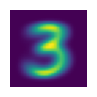

In [225]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

According to this dataset, this is the ideal number 3! (You may not like it, but this is what peak number 3 performance looks like.) You can see how it's very dark where all the images agree it should be dark, but it becomes wispy and blurry where the images disagree. 

Let's do the same thing for the 7s, but put all the steps together at once to save some time:

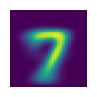

In [226]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

Let's now pick an arbitrary 3 and measure its *distance* from our "ideal digits."

> stop: Stop and Think!: How would you calculate how similar a particular image is to each of our ideal digits? Remember to step away from this book and jot down some ideas before you move on! Research shows that recall and understanding improves dramatically when you are engaged with the learning process by solving problems, experimenting, and trying new ideas yourself

Here's a sample 3:

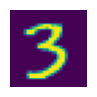

In [227]:
a_3 = stacked_threes[1]
show_image(a_3);

How can we determine its distance from our ideal 3? We can't just add up the differences between the pixels of this image and the ideal digit. Some differences will be positive while others will be negative, and these differences will cancel out, resulting in a situation where an image that is too dark in some places and too light in others might be shown as having zero total differences from the ideal. That would be misleading!

To avoid this, there are two main ways data scientists measure distance in this context:

- Take the mean of the *absolute value* of differences (absolute value is the function that replaces negative values with positive values). This is called the *mean absolute difference* or *L1 norm*
- Take the mean of the *square* of differences (which makes everything positive) and then take the *square root* (which undoes the squaring). This is called the *root mean squared error* (RMSE) or *L2 norm*.

> important: It's Okay to Have Forgotten Your Math: In this book we generally assume that you have completed high school math, and remember at least some of it... But everybody forgets some things! It all depends on what you happen to have had reason to practice in the meantime. Perhaps you have forgotten what a _square root_ is, or exactly how they work. No problem! Any time you come across a maths concept that is not explained fully in this book, don't just keep moving on; instead, stop and look it up. Make sure you understand the basic idea, how it works, and why we might be using it. One of the best places to refresh your understanding is Khan Academy. For instance, Khan Academy has a great [introduction to square roots](https://www.khanacademy.org/math/algebra/x2f8bb11595b61c86:rational-exponents-radicals/x2f8bb11595b61c86:radicals/v/understanding-square-roots).

In [228]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [229]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In both cases, the distance between our 3 and the "ideal" 3 is less than the distance to the ideal 7. So our simple model will give the right prediction in this case.

PyTorch already provides both of these as *loss functions*. You'll find these inside `torch.nn.functional`, which the PyTorch team recommends importing as `F` (and is available by default under that name in fastai):

In [230]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

Here `mse` stands for *mean squared error*, and `l1` refers to the standard mathematical jargon for *mean absolute value* (in math it's called the *L1 norm*).

> S: Intuitively, the difference between L1 norm and mean squared error (MSE) is that the latter will penalize bigger mistakes more heavily than the former (and be more lenient with small mistakes).

> _L1 loss_ is just equal to `(a-b).abs().mean()`, where `a` and `b` are tensors.

Learn more about Regression Metrics in math book chapter: __Regression Metrics: Understanding MSE, MAE, RMSE and MAD__

## Computing Metrics Using Broadcasting

Recall that a metric is a number that is calculated based on the predictions of our model, and the correct labels in our dataset, in order to tell us how good our model is. For instance, we could use either of the functions we saw in the previous section, mean squared error, or mean absolute error, and take the average of them over the whole dataset. However, neither of these are numbers that are very understandable to most people; in practice, we normally use *accuracy* as the metric for classification models.

As we've discussed, we want to calculate our metric over a *validation set*. This is so that we don't inadvertently overfit—that is, train a model to work well only on our training data. This is not really a risk with the pixel similarity model we're using here as a first try, since it has no trained components, but we'll use a validation set anyway to follow normal practices and to be ready for our second try later.

To get a validation set we need to remove some of the data from training entirely, so it is not seen by the model at all. As it turns out, the creators of the MNIST dataset have already done this for us. Do you remember how there was a whole separate directory called *valid*? That's what this directory is for!

So to start with, let's create tensors for our 3s and 7s from that directory. These are the tensors we will use to calculate a metric measuring the quality of our first-try model, which measures distance from an ideal image:

In [231]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

It's good to get in the habit of checking shapes as you go. Here we see two tensors, one representing the 3s validation set of 1,010 images of size 28×28, and one representing the 7s validation set of 1,028 images of size 28×28.

We ultimately want to write a function, `is_3`, that will decide if an arbitrary image is a 3 or a 7. It will do this by deciding which of our two "ideal digits" this arbitrary image is closer to. For that we need to define a notion of distance—that is, a function that calculates the distance between two images.

We can write a simple function that calculates the mean absolute error using an expression very similar to the one we wrote in the last section:

In [232]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

__Side:__ In python, we can access the last element in an array by using `-1`, In our `mean` function we are passing `(-1, -2)` which means drop the last two dimenstions, in our case we have `(batch_size, channels, height, width)` this reduces the tensor from shape `(batch_size, height, width)` to shape `(batch_size,)`, where each value is the average pixel difference for one image.

This is the same value we previously calculated for the distance between these two images, the ideal 3 `mean3` and the arbitrary sample 3 `a_3`, which are both single-image tensors with a shape of `[28,28]`.

But in order to calculate a metric for overall accuracy, we will need to calculate the distance to the ideal 3 for _every_ image in the validation set. How do we do that calculation? We could write a loop over all of the single-image tensors that are stacked within our validation set tensor, `valid_3_tens`, which has a shape of `[1010,28,28]` representing 1,010 images. But there is a better way.

Something very interesting happens when we take this exact same distance function, designed for comparing two single images, but pass in as an argument `valid_3_tens`, the tensor that represents the 3s validation set:

In [233]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

Instead of complaining about shapes not matching, it returned the distance for every single image as a vector (i.e., a rank-1 tensor) of length 1,010 (the number of 3s in our validation set). How did that happen?

Take another look at our function `mnist_distance`, and you'll see we have there the subtraction `(a-b)`. The magic trick is that PyTorch, when it tries to perform a simple subtraction operation between two tensors of different ranks, will use *broadcasting*. That is, it will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank. Broadcasting is an important capability that makes tensor code much easier to write.

After broadcasting so the two argument tensors have the same rank, PyTorch applies its usual logic for two tensors of the same rank: it performs the operation on each corresponding element of the two tensors, and returns the tensor result. For instance:

In [234]:
tensor([0,1], [2,4], [10,10]) - tensor([4,5])

tensor([[-4, -4],
        [-2, -1],
        [ 6,  5]])

<div>
<img src="./images/broadcasting.png" width="450"/>
</div>

So in this case, PyTorch treats `mean3`, a rank-2 tensor representing a single image, as if it were 1,010 copies of the same image, and then subtracts each of those copies from each 3 in our validation set. What shape would you expect this tensor to have? Try to figure it out yourself before you look at the answer below:

In [235]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

We can use `mnist_distance` to figure out whether an image is a 3 or not by using the following logic: if the distance between the digit in question and the ideal 3 is less than the distance to the ideal 7, then it's a 3. This function will automatically do broadcasting and be applied elementwise, just like all PyTorch functions and operators:

In [236]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

Let's test it on our example case:

In [237]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

Note that when we convert the Boolean response to a float, we get `1.0` for `True` and `0.0` for `False`. Thanks to broadcasting, we can also test it on the full validation set of 3s:

In [238]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

Now we can calculate the accuracy for each of the 3s and 7s by taking the average of that function for all 3s and its inverse for all 7s:

In [239]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

This looks like a pretty good start! We're getting over 90% accuracy on both 3s and 7s, and we've seen how to define a metric conveniently using broadcasting.

But let's be honest: 3s and 7s are very different-looking digits. And we're only classifying 2 out of the 10 possible digits so far. So we're going to need to do better!

To do better, perhaps it is time to try a system that does some real learning—that is, that can automatically modify itself to improve its performance. In other words, it's time to talk about the training process, and SGD.

---
---